In [1]:
import geopandas as gpd
import pandas as pd
from download import download

In [6]:
download("https://www.dropbox.com/s/3csr147piqc5w06/nairobi_slum_subset.zip?dl=0", "nairobi_slum_subset", kind="zip")

Creating data folder...
Extracting zip file...
Successfully downloaded / unzipped to nairobi_slum_subset


'nairobi_slum_subset'

In [8]:
val = gpd.read_file("nairobi_slum_subset/nairobi_slum_subset")

In [9]:
val

,id,lulc,geometry
0,14,1,"POLYGON ((240190.000 9861680.000, 240240.000 9..."
1,27,2,"POLYGON ((240590.000 9854580.000, 240640.000 9..."
2,47,2,"POLYGON ((241440.000 9854380.000, 241490.000 9..."
3,70,2,"POLYGON ((242240.000 9865480.000, 242290.000 9..."
4,83,2,"POLYGON ((242540.000 9854630.000, 242590.000 9..."
...,...,...,...
495,3915,2,"POLYGON ((283990.000 9859430.000, 284040.000 9..."
496,3926,2,"POLYGON ((284590.000 9860130.000, 284640.000 9..."
497,3945,2,"POLYGON ((285240.000 9859680.000, 285290.000 9..."
498,3947,2,"POLYGON ((285340.000 9860230.000, 285390.000 9..."


In [10]:
tess = gpd.read_parquet("../../nairobi/tessellation.pq")

In [11]:
clusters = pd.read_parquet("../../nairobi/cluster_labels15.pq")

In [13]:
clusters

,uID,clusters
0,0,7.0
1,1,6.0
2,2,8.0
3,3,2.0
4,4,10.0
...,...,...
507527,507527,14.0
507528,507528,0.0
507529,507529,10.0
507530,507530,7.0


In [15]:
tess.head()

,uID,geometry,bID,nID,cluster
0,0,"POLYGON ((243228.764 9870042.287, 243226.848 9...",1.0,65048.0,7.0
1,1,"POLYGON ((257670.437 9870086.506, 257670.828 9...",2.0,108788.0,6.0
2,2,"POLYGON ((257369.643 9870064.500, 257367.941 9...",2.0,108683.0,8.0
3,3,"POLYGON ((253625.044 9870047.012, 253620.015 9...",4.0,50622.0,2.0
4,4,"POLYGON ((256431.300 9870058.024, 256429.304 9...",5.0,108238.0,10.0


In [18]:
val.crs == tess.crs

True

In [14]:
tess['cluster'] = clusters.clusters

In [19]:
%time inp, res = tess.sindex.query_bulk(val.geometry)

CPU times: user 386 ms, sys: 39.8 ms, total: 426 ms
Wall time: 423 ms


In [21]:
joined = gpd.sjoin(tess, val)

In [22]:
joined

,uID,geometry,bID,nID,cluster,index_right,id,lulc
16952,16975,"POLYGON ((266949.520 9869125.163, 266948.388 9...",423.0,51820.0,0.0,407,3063,1
17058,17081,"POLYGON ((266973.802 9869127.916, 266973.643 9...",423.0,44528.0,2.0,407,3063,1
17160,17183,"POLYGON ((267008.393 9869120.886, 267005.633 9...",423.0,113048.0,2.0,407,3063,1
17219,17242,"POLYGON ((266970.834 9869120.358, 266972.561 9...",423.0,44541.0,10.0,407,3063,1
17289,17313,"POLYGON ((267005.340 9869114.106, 267004.854 9...",423.0,113048.0,0.0,407,3063,1
...,...,...,...,...,...,...,...,...
506297,507394,"POLYGON ((244839.236 9851420.561, 244838.818 9...",12563.0,102497.0,7.0,17,219,2
506358,507455,"POLYGON ((244838.288 9851321.487, 244835.718 9...",12563.0,102531.0,0.0,17,219,2
506194,507291,"POLYGON ((247386.559 9851449.628, 247386.390 9...",12573.0,103613.0,0.0,37,403,2
506195,507292,"POLYGON ((247444.265 9851446.055, 247443.547 9...",12573.0,103613.0,0.0,37,403,2


In [27]:
pd.crosstab(joined.cluster, joined.lulc)

lulc,1,2,3,7,8
cluster,,,,,
0.0,64,50,101,109,48
1.0,109,65,24,122,118
2.0,110,63,21,57,85
3.0,80,50,25,78,101
4.0,111,66,26,128,147
5.0,65,28,47,201,76
6.0,113,40,82,114,186
7.0,61,42,176,141,59
8.0,72,33,15,184,87


In [28]:
gdf = gpd.read_parquet("../../nairobi/buildings.pq")

In [29]:
gdf['clusters'] = clusters.clusters

<AxesSubplot:>

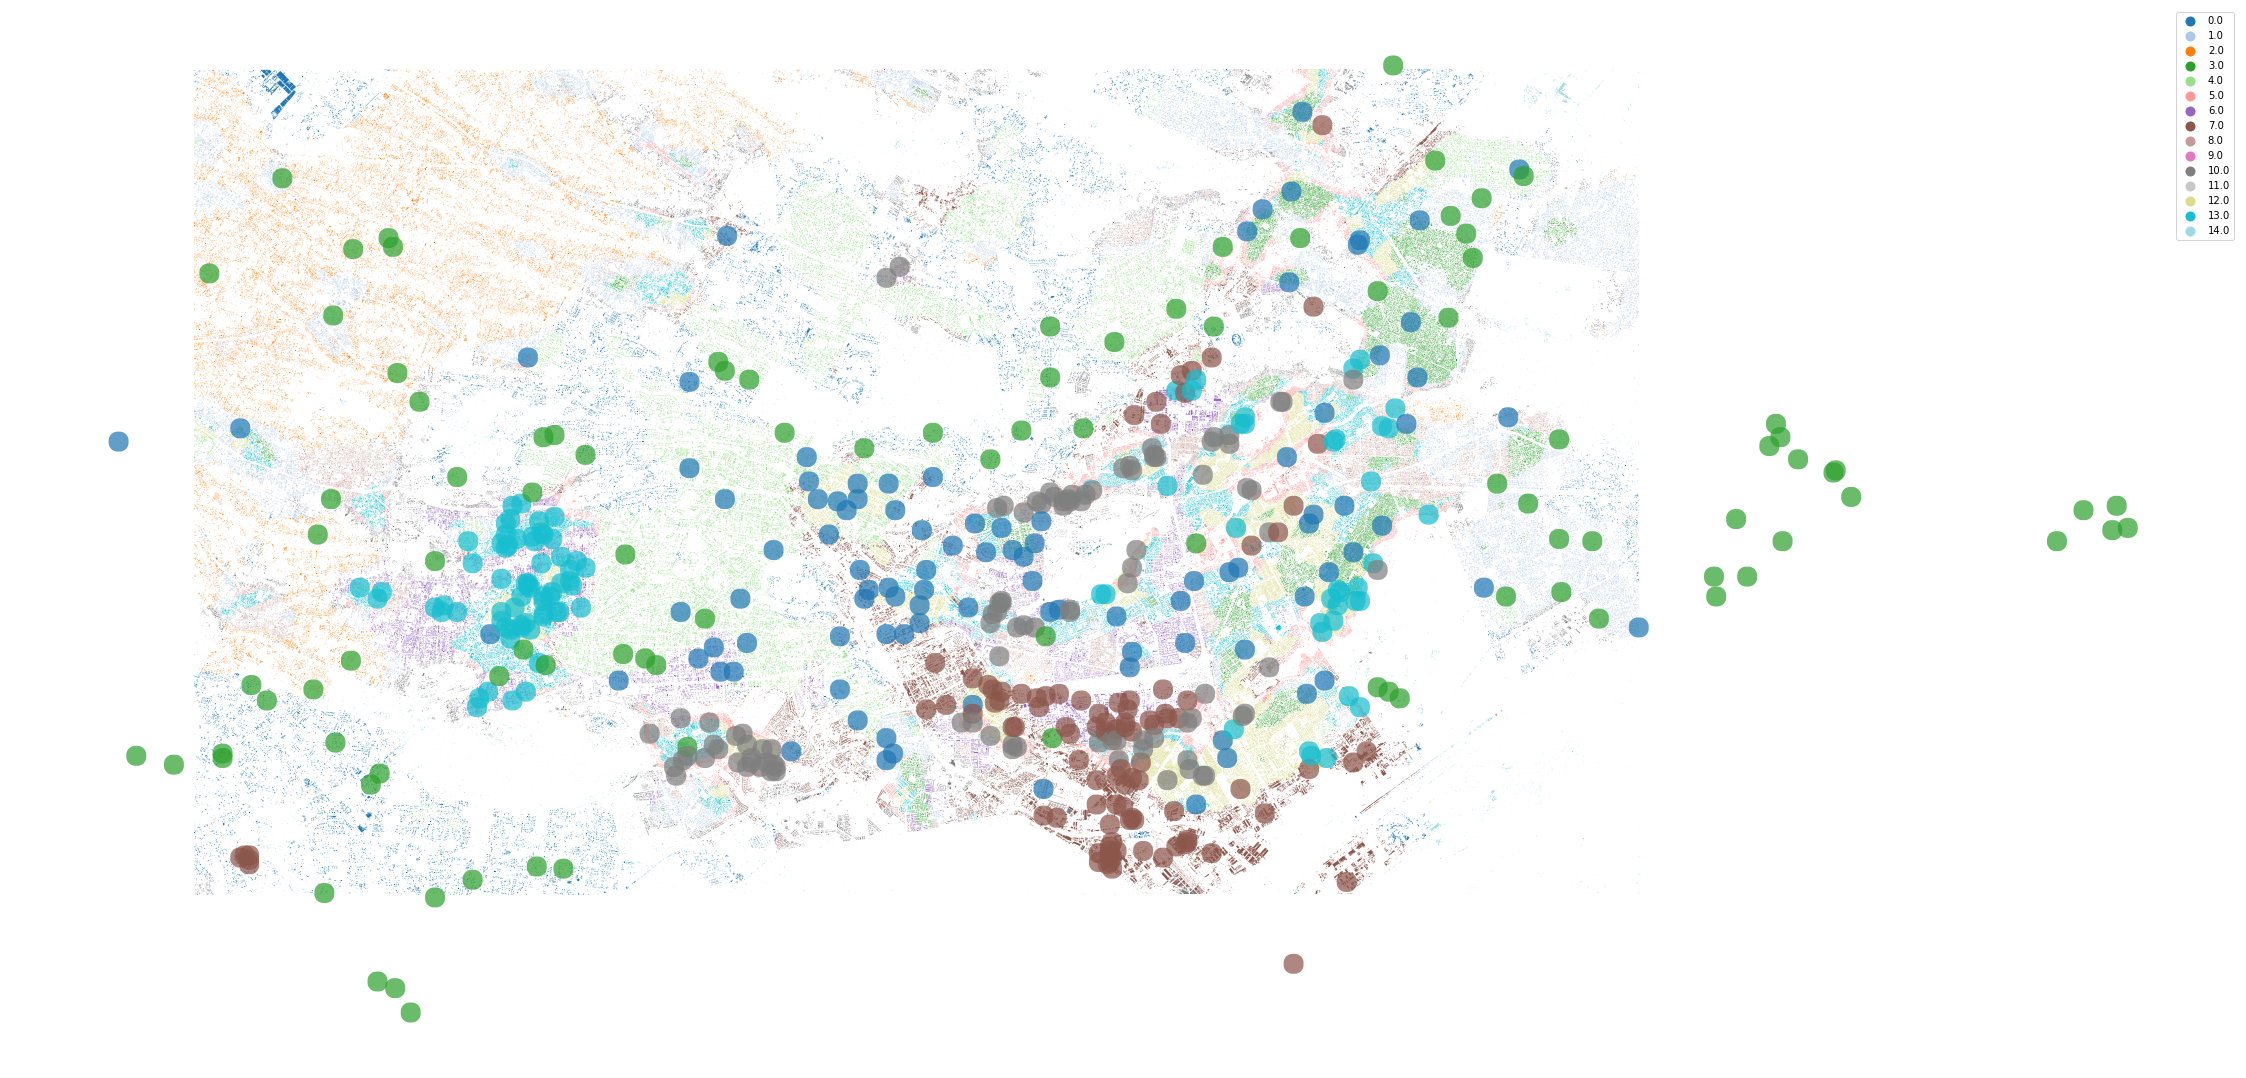

In [36]:
ax = gdf.plot('clusters', categorical=True, legend=True, figsize=(40, 40), cmap='tab20')
ax.set_axis_off()
val.plot('lulc', categorical=True, ax=ax, zorder=2, alpha=.7)

<AxesSubplot:>

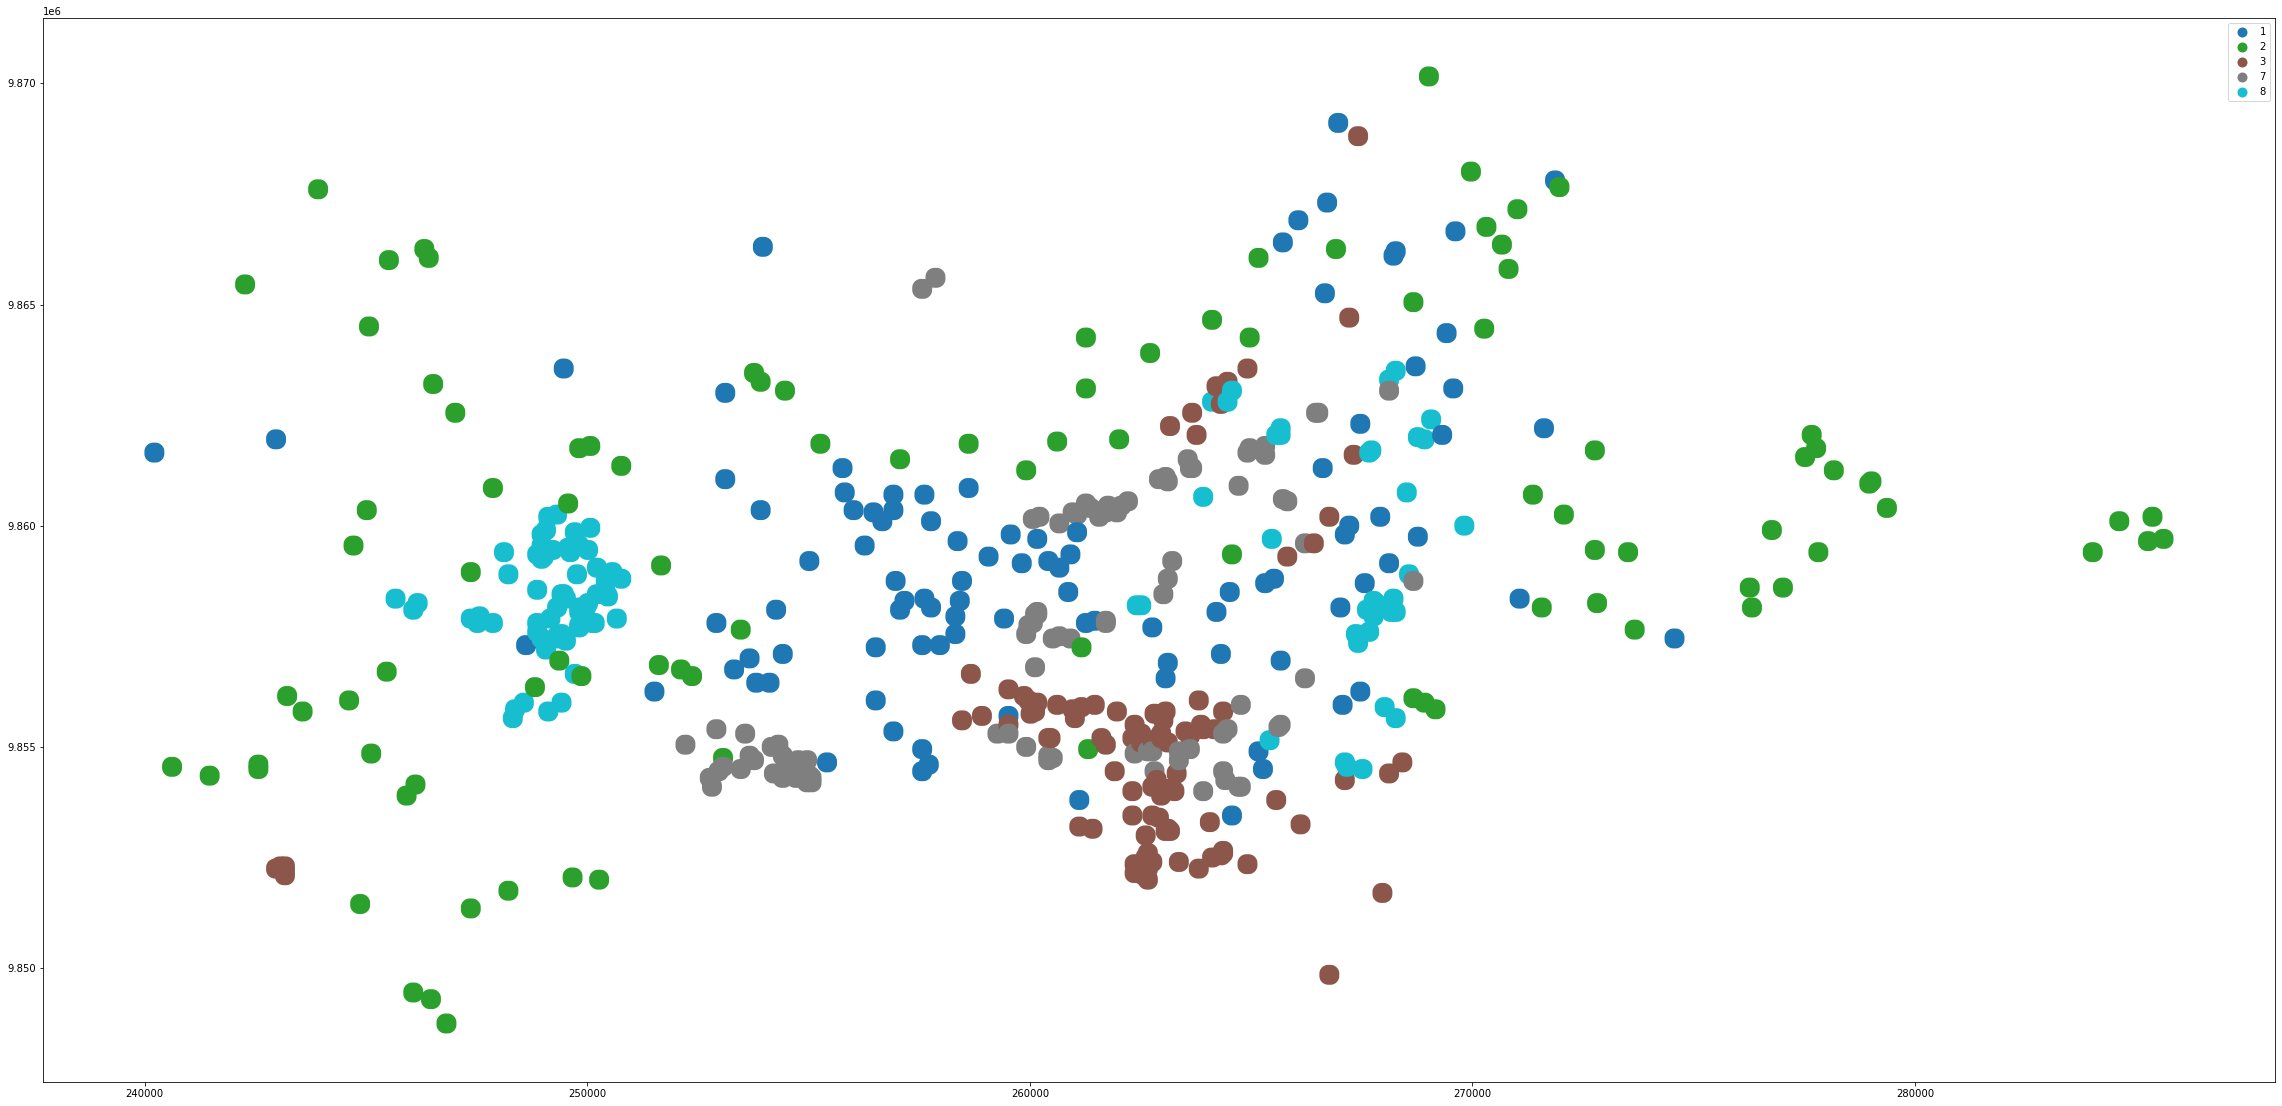

In [33]:
val.geometry = val.buffer(200)
val.plot('lulc', categorical=True, legend=True, figsize=(40, 40))